In [1]:
import pandas as pd
from pathlib import Path

# visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

## Read files from Zenodo

In [2]:
url = "https://zenodo.org/record/151190/files/Depression-Dataset-SLIM-DevelopmentTrainingSet.txt"
df = pd.read_table(url, index_col="ID")

## Clean datasets

In [3]:
# rename columns
df.rename(columns={"Incl(1)/Excl(0)":"label_included", "Author":"authors"}, inplace=True)
df.columns = map(str.lower, df.columns)

In [4]:
# sort by label_included
df = df.sort_values("label_included", ascending=False, ignore_index=True)

In [5]:
# reset ids
df["record_id"] = df.index + 1

In [6]:
# retain useful columns
df = df[["record_id", "title", "abstract", "authors", "year", "label_included"]]

## Export datasets

In [7]:
Path("output").mkdir(parents=True, exist_ok=True)
df.to_csv("output/Bannach-Brown_2019.csv", index=False)

## Datasets statistics

In [8]:
n = len(df)
n_inc = df["label_included"].sum()
n_exc = n - n_inc

print("Number of papers with missing title:    ", df["title"].isna().sum(), "\n")
print("Number of papers with missing abstract: ", df["abstract"].isna().sum(), "\n")
print("Total number of papers:                 ", n, "\n")
print("Total number of EXCLUSIONS:             ", n_exc, "\n")
print("Total number of INCLUSIONS:             ", n_inc, " (", round(100*n_inc/n, 2), "% )\n")

Number of papers with missing title:     0 

Number of papers with missing abstract:  394 

Total number of papers:                  1993 

Total number of EXCLUSIONS:              1713 

Total number of INCLUSIONS:              280  ( 14.05 % )



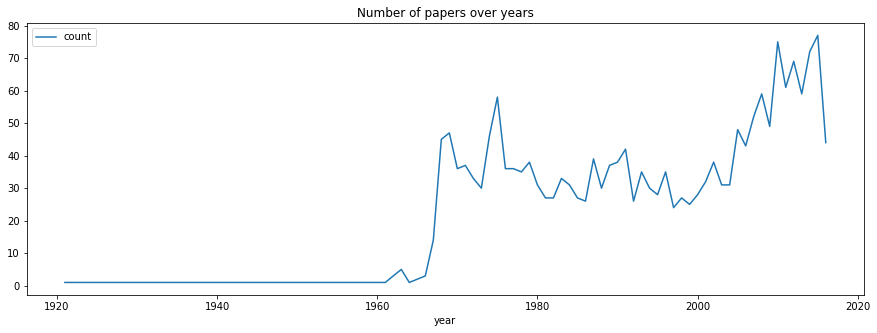

In [9]:
# number of papers over years
df.groupby("year").size().reset_index(name="count").set_index("year").plot(figsize=(15,5))
plt.title("Number of papers over years")
plt.show()

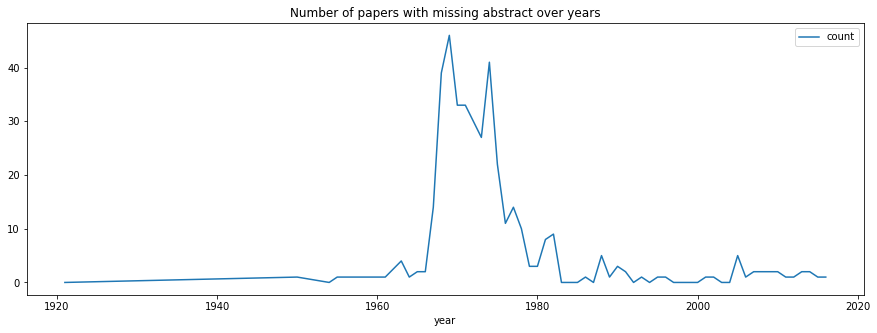

In [10]:
# missing abstract over years
df["abstract"].isna().groupby(df["year"]).sum().astype(int).reset_index(name="count").set_index("year").\
plot(figsize=(15,5))
plt.title("Number of papers with missing abstract over years")
plt.show()

There are 212035 words in the combination of all titles. 

There are 2287133 words in the combination of all abstracts. 



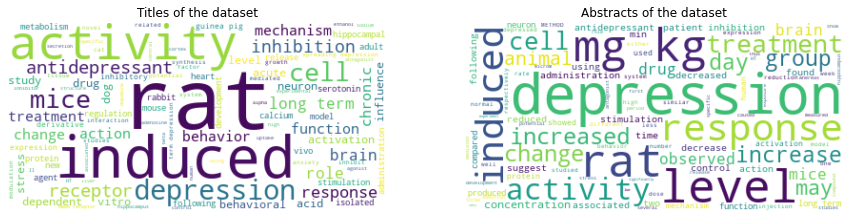

In [11]:
# word cloud for titles and abstracts
# create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["effect", "effects", "result", "results", "conclusion", "conclusions"])

# create word cloud text
title_text = " ".join(word for word in df.title.dropna())
abstract_text = " ".join(word for word in df.abstract.dropna())
print ("There are {} words in the combination of all titles.".format(len(title_text)), "\n")
print ("There are {} words in the combination of all abstracts.".format(len(abstract_text)), "\n")

# generate word cloud images
title_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(title_text)
abstract_wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(abstract_text)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15, 15])
ax1.imshow(title_wordcloud, interpolation="bilinear")
ax1.set_title("Titles of the dataset")
ax1.axis("off")
ax2.imshow(abstract_wordcloud, interpolation="bilinear")
ax2.set_title("Abstracts of the dataset")
ax2.axis("off")
plt.show()